<a href="https://colab.research.google.com/github/nandhukumar86/CapstonePneumoniaDetection/blob/main/Pneumonia_Detection_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


In [15]:
import pickle

datasetFolder = '/content/drive/MyDrive/CapstoneDataSet/dataset/'

file = open(datasetFolder + 'RezisedLabel.pickle', 'rb')
dfLabelsCopy = pickle.load(file)
file.close()

In [16]:
dfLabelsCopy.head()

,patientId,x,y,width,height,Target,X,Y,Xo,Yo,xo,yo,widtho,heighto
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1024,1024,256,256,NaN,NaN,NaN,NaN
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024,256,256,66.0,38.0,54.0,95.0


In [17]:
# Getting Center of Bounding Boxes
dfLabelsCopy['centerx'] = dfLabelsCopy.xo + (dfLabelsCopy.widtho/2)
dfLabelsCopy['centery'] = dfLabelsCopy.yo + (dfLabelsCopy.heighto/2)

df1 = dfLabelsCopy[dfLabelsCopy.Target == 1].copy(deep=True)

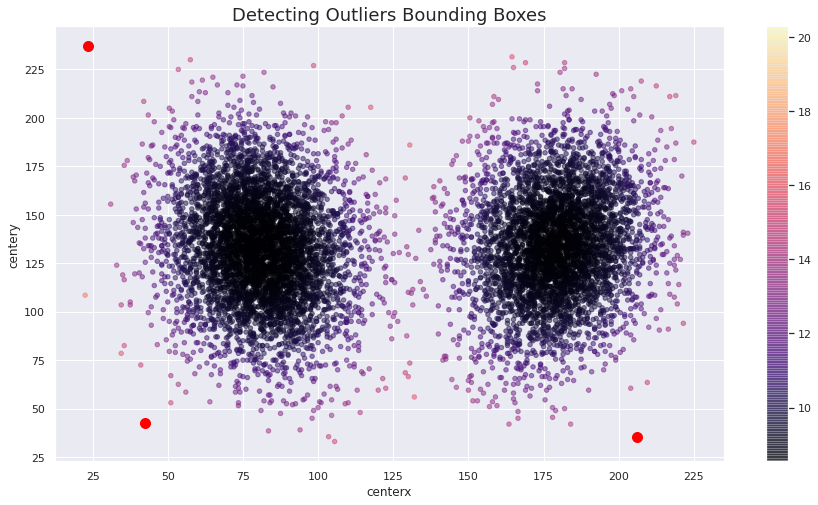

In [18]:
# GaussianMixture for clustering 

from sklearn.mixture import GaussianMixture

clf = GaussianMixture(n_components=2)

clf.fit(df1[['centerx', 'centery']])
center_probs = clf.predict_proba(df1[['centerx', 'centery']])
Z = -clf.score_samples(df1[['centerx', 'centery']])
outliers = df1.iloc[Z > 17]
fig, ax = plt.subplots(figsize=(15,8))
df1[['centerx','centery']].plot.scatter('centerx', 'centery', c=Z, alpha=0.5, cmap='magma', ax=ax)
outliers.plot.scatter('centerx', 'centery', c='red', marker='o', s=100, ax=ax)

_ = ax.set_title('Detecting Outliers Bounding Boxes', fontsize=18)

In [44]:
import cv2
import os
import glob
import shutil
from google.colab.patches import cv2_imshow

In [34]:
inputdir = '/content/drive/MyDrive/CapstoneDataSet/dataset/jpg_reshaped_train'
presentOutdir = '/content/drive/MyDrive/CapstoneDataSet/dataset/jpg_reshaped_train/present'
AbsentOutdir = '/content/drive/MyDrive/CapstoneDataSet/dataset/jpg_reshaped_train/absent'


In [ ]:
os.mkdir(presentOutdir)
os.mkdir(AbsentOutdir)

In [34]:
presentFileList = list(dfLabelsCopy[dfLabelsCopy.Target == 1].patientId+'.jpg')
absentFileList = list(dfLabelsCopy[dfLabelsCopy.Target == 0].patientId+'.jpg')


In [45]:
for f in presentFileList:
  try:
    shutil.move(inputdir +'/'+ f,presentOutdir+'/'+f)
  except:
    continue;

In [46]:
for f in absentFileList:
  try:
    shutil.move(inputdir +'/'+ f,AbsentOutdir+'/'+f)
  except:
    continue;

In [65]:
def show_img(patientId):
  points = np.array(dfLabelsCopy[dfLabelsCopy.patientId == patientId][['xo','yo','widtho','heighto']])

  img = cv2.imread(presentOutdir + '/' + patientId + '.jpg')

  for i in points:
    start = (int(i[0]), int(i[1]))
    end = (int(i[0]+i[2]) , int(i[1]+i[3]))
    color = (255,0,0)
    img = cv2.rectangle(img, start , end, color, 2)

  cv2_imshow(img)


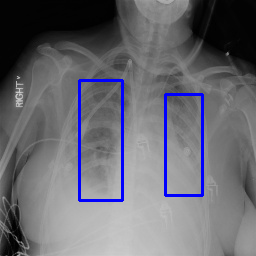

In [66]:
show_img('000db696-cf54-4385-b10b-6b16fbb3f985')

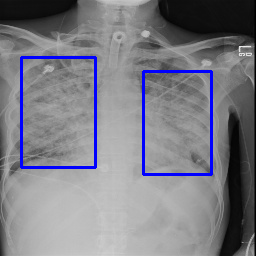

In [67]:
show_img('000fe35a-2649-43d4-b027-e67796d412e0')

### Data Augmentation Step for Categories


In [21]:

# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [24]:
# Categorical Augmentation

# re-size all the images to this
IMAGE_SIZE = [128, 128]

train_path = '/content/drive/MyDrive/CapstoneDataSet/dataset/jpg_reshaped_train/'
test_path = '/content/drive/MyDrive/CapstoneDataSet/dataset/jpg_reshaped_test/'

In [25]:
# useful for getting number of output classes
n_classes = 2

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.25)

In [28]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')

Found 20013 images belonging to 2 classes.


In [29]:
validation_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='validation')

Found 6671 images belonging to 2 classes.
